In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder


In [ ]:
customer_df = pd.read_csv('99Bikes_CustomerDemographics_CLEAN.csv')
transaction_df = pd.read_csv('99Bikes_Transaction_CLEAN.csv')
merged_df = pd.merge(customer_df,transaction_df,on='customer_id')
merged_df['profit'] = merged_df['list_price'] - merged_df['standard_cost']
merged_df.head(5)

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,owns_car,tenure,age,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit
0,2,Male,81,1980-12-16,Financial Services,Yes,16.0,37,2261,1,2017-05-04,True,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,448.68
1,2,Male,81,1980-12-16,Financial Services,Yes,16.0,37,6743,85,2017-06-11,False,Approved,WeareA2B,Standard,medium,medium,752.64,205.36,547.28
2,2,Male,81,1980-12-16,Financial Services,Yes,16.0,37,16411,26,2017-08-24,False,Approved,WeareA2B,Standard,medium,medium,1992.93,762.63,1230.30
3,3,Male,61,1954-01-20,Property,Yes,15.0,63,10302,33,2017-02-23,False,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,144.26
4,3,Male,61,1954-01-20,Property,Yes,15.0,63,11005,94,2017-09-16,False,Approved,Giant Bicycles,Standard,medium,large,1635.30,993.66,641.64


In [ ]:
# Calculate quartiles for 'profit' in merged_df
quartiles_merged = merged_df['profit'].quantile([0.25, 0.5, 0.75])

# Define function to classify profit
def classify_profit_merged(value):
    if value <= quartiles_merged[0.25]:
        return 'Low'
    elif value <= quartiles_merged[0.5]:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new 'profit_group' column in merged_df
merged_df['profit_group'] = merged_df['profit'].apply(classify_profit_merged)

# Print the first few rows to verify the new column
print(merged_df.head())

   customer_id gender  past_3_years_bike_related_purchases         DOB  \
0            2   Male                                   81  1980-12-16   
1            2   Male                                   81  1980-12-16   
2            2   Male                                   81  1980-12-16   
3            3   Male                                   61  1954-01-20   
4            3   Male                                   61  1954-01-20   

  job_industry_category owns_car  tenure  age  transaction_id  product_id  \
0    Financial Services      Yes    16.0   37            2261           1   
1    Financial Services      Yes    16.0   37            6743          85   
2    Financial Services      Yes    16.0   37           16411          26   
3              Property      Yes    15.0   63           10302          33   
4              Property      Yes    15.0   63           11005          94   

   ... online_order  order_status           brand product_line product_class  \
0  ...      

In [ ]:
def categorize_age(age):
    if age < 18:
        return 'child'
    elif age < 30:
        return 'young adult'
    elif age < 65:
        return 'adult'
    else:
        return 'senior'

# Apply function to create a new 'age_group' column
merged_df['age_group'] = merged_df['age'].apply(categorize_age)
merged_df.head(5)

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,owns_car,tenure,age,transaction_id,product_id,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,profit_group,age_group
0,2,Male,81,1980-12-16,Financial Services,Yes,16.0,37,2261,1,...,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,448.68,High,adult
1,2,Male,81,1980-12-16,Financial Services,Yes,16.0,37,6743,85,...,Approved,WeareA2B,Standard,medium,medium,752.64,205.36,547.28,High,adult
2,2,Male,81,1980-12-16,Financial Services,Yes,16.0,37,16411,26,...,Approved,WeareA2B,Standard,medium,medium,1992.93,762.63,1230.30,High,adult
3,3,Male,61,1954-01-20,Property,Yes,15.0,63,10302,33,...,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,144.26,Medium,adult
4,3,Male,61,1954-01-20,Property,Yes,15.0,63,11005,94,...,Approved,Giant Bicycles,Standard,medium,large,1635.30,993.66,641.64,High,adult


  job_industry_category        profit
5         Manufacturing  2.175955e+06
2    Financial Services  2.158432e+06
6                 Other  1.784827e+06
3                Health  1.664394e+06
8                Retail  9.902706e+05
7              Property  7.072366e+05
1         Entertainment  3.888813e+05
4                    IT  3.834798e+05
0           Argiculture  3.071304e+05
9    Telecommunications  1.887872e+05


<ipython-input-48-f2a1e6256933>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


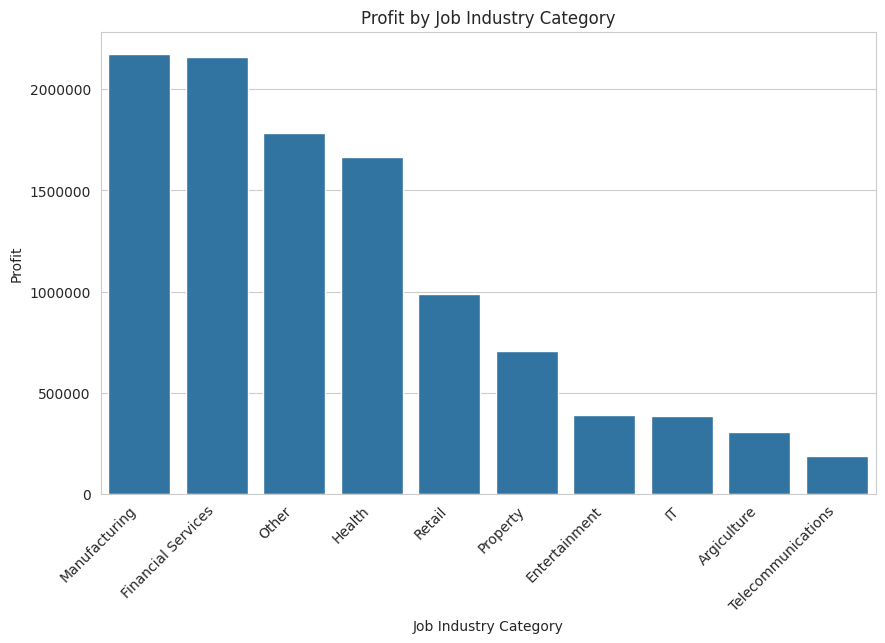

In [ ]:
profit_by_category = merged_df.groupby('job_industry_category')['profit'].sum().reset_index()


profit_by_category_sorted = profit_by_category.sort_values(by='profit', ascending=False)

# Display the result
print(profit_by_category_sorted)

sns.set_style("whitegrid")

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))  # Set the size of the plot
plot = sns.barplot(x='job_industry_category', y='profit', data=profit_by_category_sorted)

# Add labels and title
plt.xlabel('Job Industry Category')
plt.ylabel('Profit')
plt.title('Profit by Job Industry Category')

# Rotate x-axis labels for better readability
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Define a formatter function to display y-axis tick labels in original units
def format_ticks(x, pos):
    return f'{x:.0f}'

formatter = FuncFormatter(format_ticks)
plot.yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()

In [ ]:
summed_df = merged_df.groupby('customer_id').agg({
    'gender': 'first',
    'age_group': 'first',
    'job_industry_category': 'first',
    'owns_car': 'first',
    'tenure': 'first',
    'profit_group': 'first'
}).reset_index()

summed_df.head(5)

,customer_id,gender,age_group,job_industry_category,owns_car,tenure,profit_group
0,2,Male,adult,Financial Services,Yes,16.0,High
1,3,Male,adult,Property,Yes,15.0,Medium
2,4,Male,adult,IT,No,7.0,Low
3,5,Female,adult,Other,Yes,8.0,Medium
4,6,Male,adult,Retail,Yes,13.0,Medium


In [ ]:
print(summed_df.select_dtypes(include=['object']).columns)


Index(['gender', 'age_group', 'job_industry_category', 'owns_car',
       'profit_group'],
      dtype='object')


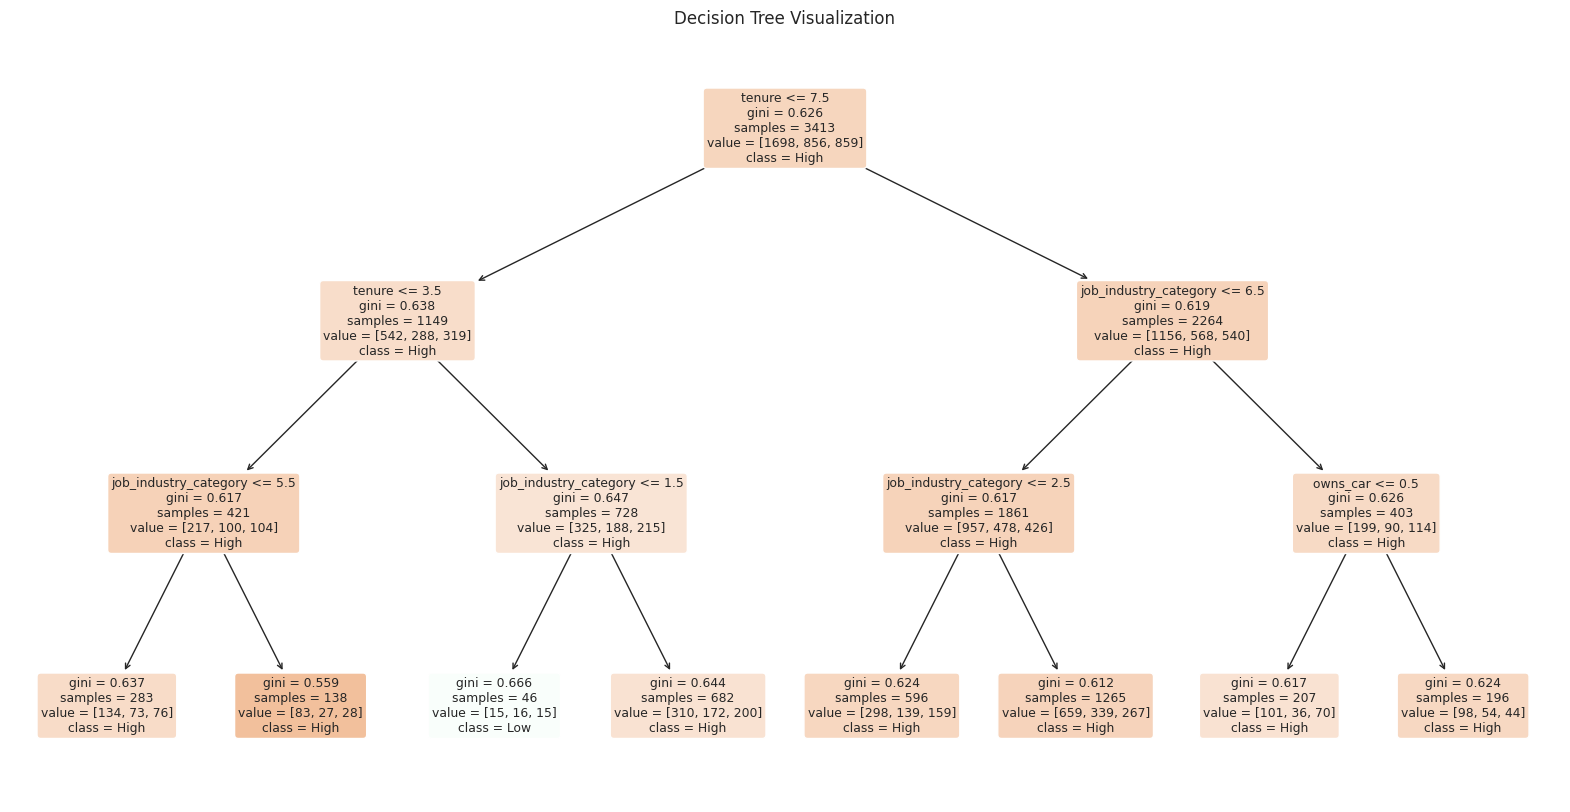

In [ ]:
label_encoders = {}
categorical_columns = ['gender', 'age_group', 'job_industry_category', 'owns_car']
for column in categorical_columns:
    le = LabelEncoder()
    summed_df[column] = le.fit_transform(summed_df[column])
    label_encoders[column] = le

# Prepare features and target
X = summed_df.drop(['customer_id', 'profit_group'], axis=1)
y = summed_df['profit_group']

# Build the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=3)  # Limit depth for a clearer visualization
dt_classifier.fit(X, y)

# Visualize the tree
plt.figure(figsize=(20, 10))  # Set appropriate size according to your screen
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=dt_classifier.classes_, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [ ]:
# # Example of reversing encoding for a single value
# original_category = label_encoders['job_industry_category'].inverse_transform([1])[0]
# print("Encoded value 1 corresponds to:", original_category)

age_values = [0,1,2,3]
age_categories = label_encoders['age_group'].inverse_transform(age_values)
gender_values = [0,1]
gender_categories = label_encoders['gender'].inverse_transform(gender_values)
# If you have an array of encoded values
encoded_values = [0,1,2,3,4,5,6,7,8,9]  # These would be the encoded categories in your decision tree
original_categories = label_encoders['job_industry_category'].inverse_transform(encoded_values)
print("Encoded values 0,1,2,3,4,5,6,7,8,9 correspond to:", original_categories)
print("Encoded values 0,1,2,3  correspond to:", age_categories)
print("Encoded values 0,1,  correspond to:", gender_categories)

Encoded values 0,1,2,3,4,5,6,7,8,9 correspond to: ['Argiculture' 'Entertainment' 'Financial Services' 'Health' 'IT'
 'Manufacturing' 'Other' 'Property' 'Retail' 'Telecommunications']
Encoded values 0,1,2,3  correspond to: ['adult' 'child' 'senior' 'young adult']
Encoded values 0,1,  correspond to: ['Female' 'Male']
